In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

### Quick survey
[https://goo.gl/forms/aU1sT0c2hqMwZjmE3](https://goo.gl/forms/aU1sT0c2hqMwZjmE3)

<cont style="margin:auto">
<img src="https://s-media-cache-ak0.pinimg.com/originals/33/07/24/330724abbfde900c94af94ed0fbc5f9f.jpg" height="125%" width="125%" />
</font>

<ul>
    <li><code class="python">np.random.seed</code><div class="fragment" style="color:blue">Sets seed to allow reproducible randomness</div></li>
    <li> List and array operations: <div class="fragment" style="color:blue">Shuffle or choose random entries from lists</div>
        <ul>
    
            <li><code class="python">np.random.choice,np.random.shuffle</code></li>
        </ul>
    </li>
    <li> Distributions: <div class="fragment" style="color:blue">Sample random numbers from distributions</div>
        <ul>
    
            <li><code class="python">np.random.normal,np.random.binomial,</code></li>
            <li><code class="python">np.random.uniform,np.random.poisson</code></li>
        </ul>
    </li>
    <li>`plt.hist` <div class="fragment" style="color:blue">Plots histograms</div></li>

</ul>


### So what is all of this useful for, anyway?

### Adding Noise

If you are developing an analysis pipeline, you probably want to simulate the noise you expect from your experimental data.

#### Quick noise example

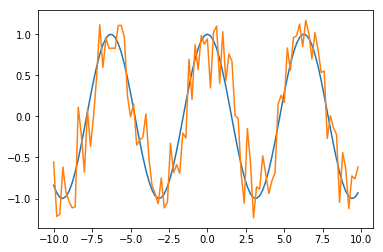

In [2]:
x = np.arange(-10,10,0.2)
y = np.cos(x)

noisy_y = y + np.random.normal(0,0.3,len(y))

plt.plot(x,y)
plt.plot(x,noisy_y)

### Simulating sampling

You might want to do an experiment computationally before you actually do the experiment to make sure you'll be able to detect what you want to detect

You are measuring the length of microtubule bundles in *S. pombe* yeast.  

+ The average length of these bundles is $5.00 \pm 1.4 \mu m$. 
+ You introduce a mutation and expect you the microtubules will now be longer: $5.5 \pm 1.4 \mu m$.  
+ You only have time to measure bundle length for 5 wildtype and 5 mutant cells.  

Assuming your expectation is right, will you be able to tell that the mutant had any effect? 


### Simulate the sampling
+ 5 samples from $5 \pm 1.4$
+ 5 samples from $5.5 \pm 1.4$

In [3]:
wildtype = np.random.normal(5,1.4,5)
mutant = np.random.normal(5.5,1.4,5)

print(wildtype)
print(mutant)

[ 5.05692081  1.95507277  4.27614585  4.68100699  5.47103124]
[ 5.60957607  7.50437117  5.24152951  8.59758911  4.29141038]


### How do we test to see if these are different? 

In [4]:
import scipy.stats

### Stats provides a wide variety of statistical tests
+ t-test: `scipy.stats.ttest_ind`
+ One-way ANOVA: `scipy.stats.f_oneway`
+ Wilcoxan Rank: `scipy.stats.ranksums`
+ $\chi^{2}$: `scipy.stats.chisquare`
+ Pearson's Correlation: `scipy.stats.pearsonr`


Figure out how to use `scipy.stats.ttest_ind`. 
+ Determine the p-value you for a t-test between your 5 wildtype and 5 mutant measurements. 
+ Can you figure out how many samples you need to meausure to reliably get a p-value < 0.05 for this expected difference in means? 


In [5]:
d = scipy.stats.ttest_ind(mutant,wildtype)
print(d.pvalue)

0.0851279733528


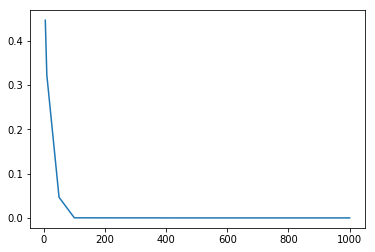

In [6]:
n_list = [5,10,50,100,500,1000]
p_list = []
for n in n_list:
    wildtype = np.random.normal(5,1.4,n)
    mutant = np.random.normal(5.5,1.4,n)
    d = scipy.stats.ttest_ind(mutant,wildtype)
    p_list.append(d.pvalue)
    
plt.plot(n_list,p_list,"-")

    
    

### Stats also provides access to probability distributions

In [7]:
d = scipy.stats.norm()
x = np.arange(-5,5,0.01)
prob_density = d.pdf(x)
cum_density = d.cdf(x)

In [8]:
def plot_distrib(d,x,name):
    """
    Function that plots the probability density and cumulative density
    functions of a distribution over the range defined in x.
    """

    fig, ax = plt.subplots(1,2,figsize=(12,5))
    ax[0].plot(x,d.pdf(x),"k-")
    ax[0].set_title("Probability Density Function ({})".format(name))
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("P(X == x)")

    ax[1].plot(x,d.cdf(x),"k-")
    ax[1].set_title("Cumulative Density Function ({})".format(name))
    ax[1].set_xlabel("x")
    ax[1].set_ylabel("P(X $\geq$ x)")
    
    bottom = np.arange(np.min(x),d.interval(0.95)[0],0.01)
    top    = np.arange(d.interval(0.95)[1],np.max(x),0.01)
    
    ax[0].fill_between(bottom,d.pdf(bottom),color="gray")
    ax[0].fill_between(top,d.pdf(top),color="gray")

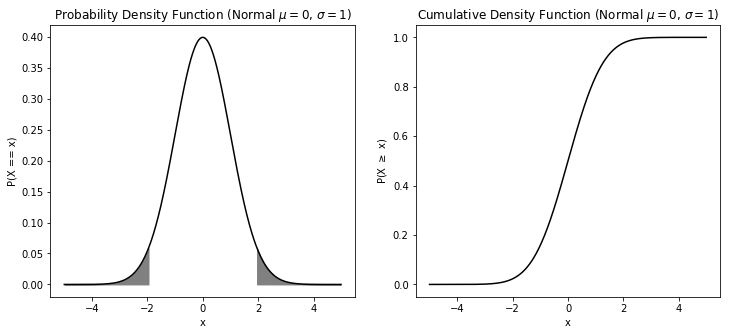

In [9]:
   
plot_distrib(d,x,"Normal $\mu = 0$, $\sigma = 1$")

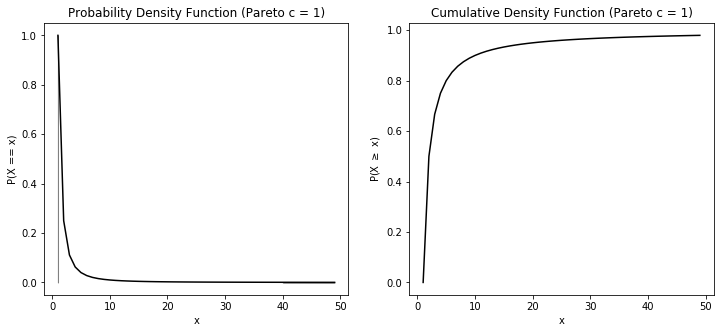

In [10]:
pareto = scipy.stats.pareto(1)
x = range(1,50)
plot_distrib(pareto,x,"Pareto c = 1")

### Summary

+ `np.random` lets you sample things (flip coins, add noise, simulate experiments)
+ `scipy.stats` lets you do statistics to analyze simulated or experimental results.